In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense

In [2]:
url = 'https://raw.githubusercontent.com/NourozR/Stock-Price-Prediction-LSTM/master/apple_share_price.csv'
df = pd.read_csv(url,usecols=[0,1,2,3,4])
df

,Date,Open,High,Low,Close
0,11-Aug-17,156.60,158.57,156.07,157.48
1,10-Aug-17,159.90,160.00,154.63,155.32
2,9-Aug-17,159.26,161.27,159.11,161.06
3,8-Aug-17,158.60,161.83,158.27,160.08
4,7-Aug-17,157.06,158.92,156.67,158.81
...,...,...,...,...,...
1659,7-Jan-11,47.71,48.05,47.41,48.02
1660,6-Jan-11,47.82,47.89,47.56,47.68
1661,5-Jan-11,47.08,47.76,47.07,47.71
1662,4-Jan-11,47.49,47.50,46.88,47.33


In [3]:
df = df.reindex(index = df.index[::-1]).reset_index(drop=True)
df

,Date,Open,High,Low,Close
0,3-Jan-11,46.52,47.18,46.41,47.08
1,4-Jan-11,47.49,47.50,46.88,47.33
2,5-Jan-11,47.08,47.76,47.07,47.71
3,6-Jan-11,47.82,47.89,47.56,47.68
4,7-Jan-11,47.71,48.05,47.41,48.02
...,...,...,...,...,...
1659,7-Aug-17,157.06,158.92,156.67,158.81
1660,8-Aug-17,158.60,161.83,158.27,160.08
1661,9-Aug-17,159.26,161.27,159.11,161.06
1662,10-Aug-17,159.90,160.00,154.63,155.32


In [9]:
df= df[['Open']]
df.head()


,Open
0,46.52
1,47.49
2,47.08
3,47.82
4,47.71


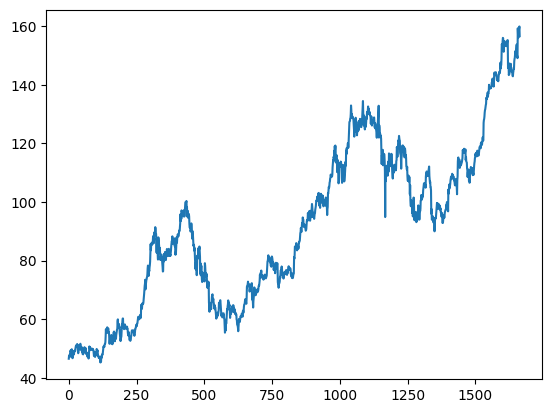

In [10]:
plt.plot(df)

In [12]:
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

In [14]:
def create_sequences(data, input_size):
    X, y = [], []
    for i in range(len(data) - input_size):
        X.append(data[i:i + input_size])
        y.append(data[i + input_size])
    return np.array(X), np.array(y)

input_size = 5
X_train, y_train = create_sequences(train_scaled, input_size)
X_test, y_test = create_sequences(test_scaled, input_size)

In [15]:
print(X_train.shape)
print(X_test.shape)

(1326, 5, 1)
(328, 5, 1)


In [17]:
model = Sequential()
model.add(LSTM(100, activation='relu',input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [18]:
history = model.fit(X_train, y_train, epochs=50, batch_size=50,validation_split=0.2)

Epoch 1/50

22/22 [==============================] - 1s 11ms/step - loss: 0.0959 - val_loss: 0.0712
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 0.0127
Epoch 3/50
22/22 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.0014
Epoch 4/50
22/22 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.0025
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: 8.0335e-04 - val_loss: 0.0024
Epoch 6/50
22/22 [==============================] - 0s 4ms/step - loss: 6.4390e-04 - val_loss: 0.0013
Epoch 7/50
22/22 [==============================] - 0s 4ms/step - loss: 5.6392e-04 - val_loss: 0.0012
Epoch 8/50
22/22 [==============================] - 0s 4ms/step - loss: 5.4048e-04 - val_loss: 0.0012
Epoch 9/50
22/22 [==============================] - 0s 4ms/step - loss: 5.3810e-04 - val_loss: 0.0011
Epoch 10/50
22/22 [==============================] - 0s 4ms/step - loss: 5.3607e-04 - val_loss: 

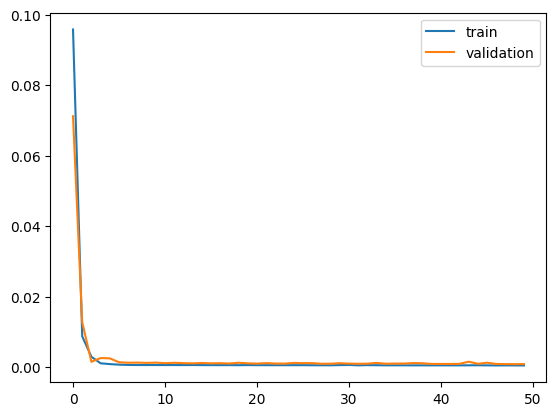

In [20]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [21]:
model.save('simple_lstm_stock_model')

INFO:tensorflow:Assets written to: simple_lstm_stock_model\assets


INFO:tensorflow:Assets written to: simple_lstm_stock_model\assets


In [22]:
train_predicted = model.predict(X_train.reshape(X_train.shape))
test_predicted = model.predict(X_test.reshape(X_test.shape))

train_predicted = scaler.inverse_transform(train_predicted)
test_predicted = scaler.inverse_transform(test_predicted)

train_actual = scaler.inverse_transform(y_train)
test_actual = scaler.inverse_transform(y_test)

train_rmse = np.sqrt(np.mean((train_actual - train_predicted) ** 2))
test_rmse = np.sqrt(np.mean((test_actual - test_predicted) ** 2))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

11/11 [==============================] - 0s 2ms/step
Train RMSE: 1.9600902187272604
Test RMSE: 2.6607070193265985


In [23]:
x1 = np.arange(0, len(train_actual))
x2 = np.arange(len(train_actual), len(train_actual)+len(test_actual))

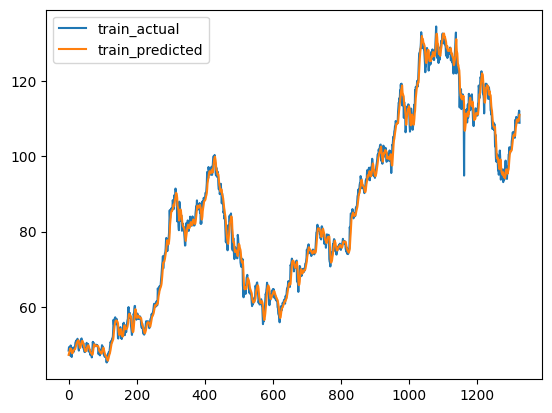

In [24]:
plt.plot(x1,train_actual)
plt.plot(x1,train_predicted)
plt.legend(['train_actual','train_predicted'])

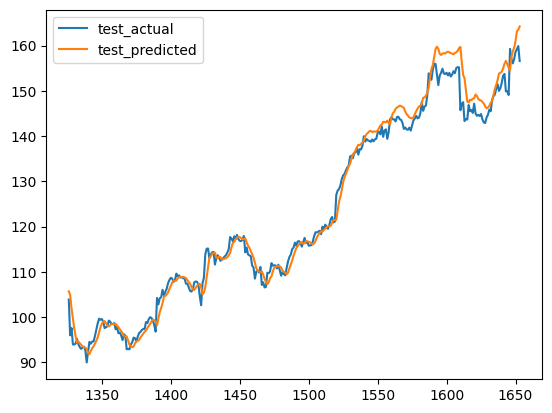

In [25]:
plt.plot(x2,test_actual)
plt.plot(x2,test_predicted)
plt.legend(['test_actual','test_predicted'])

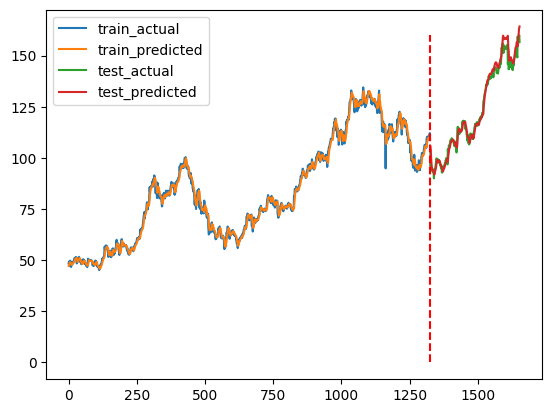

In [26]:
plt.plot(x1,train_actual)
plt.plot(x1,train_predicted)
plt.plot(x2,test_actual)
plt.plot(x2,test_predicted)
plt.legend(['train_actual','train_predicted','test_actual','test_predicted'])
plt.vlines(x=int(len(train_actual)), color='r',linestyles='dashed', ymin = 0, ymax = max(test_actual))
plt.show()

In [30]:
future_data = df.iloc[-input_size:]
future_scaled = scaler.transform(future_data)
future_sequence = np.array([future_scaled])

future_predicted = model.predict(future_sequence)
future_predicted = scaler.inverse_transform(future_predicted)

print("Future predicted values:", future_predicted)

1/1 [==============================] - 0s 17ms/step
Future predicted values: [[163.77689]]
